<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 8.2: Working with Text
- Using [NLTK](http://www.nltk.org) (Natural Language Toolkit)
- Using [spaCy](https://spacy.io)

INSTRUCTIONS:
- Run the cells
- Observe and understand the results
- Answer the questions

## Import libraries

In [1]:
import numpy, pandas, scipy, sklearn, matplotlib, seaborn, statsmodels, spacy, plotly, regex

print("NumPy       :", numpy.__version__)
print("pandas      :", pandas.__version__)
print("SciPy       :", scipy.__version__)
print("scikit-learn:", sklearn.__version__)
print("matplotlib  :", matplotlib.__version__)
print("seaborn     :", seaborn.__version__)
print("statsmodels :", statsmodels.__version__)
print("plotly      :", plotly.__version__)
print("regex       :", regex.__version__)
print("spaCy       :", spacy.__version__)

# Quick test of spaCy model
import en_core_web_sm
nlp = en_core_web_sm.load()
doc = nlp("ChatGPT is working correctly with spaCy.")
print("spaCy model test:", [ent.text for ent in doc.ents] or "No entities found")

NumPy       : 2.3.2
pandas      : 2.2.2
SciPy       : 1.16.1
scikit-learn: 1.5.2
matplotlib  : 3.10.5
seaborn     : 0.13.2
statsmodels : 0.14.2
plotly      : 5.24.1
regex       : 2.5.147
spaCy       : 3.8.7
spaCy model test: No entities found


In [2]:
#pip install nltk spacy

In [3]:
## Import Libraries
%matplotlib inline
import matplotlib.pyplot as plt
from collections import Counter

import regex as re
import spacy
#import nltk
import nltk

In [4]:
import numpy as np
print(np.__version__)

2.3.2


## Load data

In [7]:
import os
print(os.getcwd())

C:\Users\nsk_z\OneDrive\Desktop\Data Science and AI\Module 8


In [9]:
## Loading the data

input_file = 'C:/Users/nsk_z/OneDrive/Desktop/Data Science and AI/Module 8/ncc-1701-D.txt'

with open(input_file, 'r') as f:
    text = f.read()

## Inspect the data

In [12]:
print(text[:1000])

USS Enterprise (NCC-1701-D)

"For five hundred years, every ship that has borne the name of the Enterprise has become a legend. This one is no different."

The USS Enterprise (NCC-1701-D) was a 24th century United Federation of Planets Galaxy Class starship operated by Starfleet, and the fifth Federation ship to bear the name Enterprise. During her career, the Enterprise served as the Federation flagship. The Enterprise was destroyed during the Battle of Veridian III in 2371.

==History==
===Construction and launch===
The Enterprise was built at Utopia Planitia Fleet Yards orbiting Mars in the Solar system. The construction was a massive undertaking, involving thousands of people across disciplines. Construction was supervised by Commander Orfil Quinteros. Dr. Leah Brahms was responsible for much of the Enterprise's warp propulsion system design. Some of the Enterprise's components were derived from technology originally developed on the USS Pegasus.

One of the ship's nacelle tube was

## Work the data
- if necessary or desired
    - remove text or content, e.g. quotes (") or metadata (===)
    - add content or markers, e.g. (#FLAG, --NAME--)
    - remove or convert special symbols, e.g. "é" to "e"
    - remove or convert emoticons

In [14]:
# ANSWER
# remove text or content, e.g. quotes (") or metadata (===)
text = re.sub(r'"[^"]*"', '', text)

# Remove (==)
text = re.sub(r'===.*?===', '', text)
text = re.sub(r'==.*?==', '', text)

print(text)


USS Enterprise (NCC-1701-D)



The USS Enterprise (NCC-1701-D) was a 24th century United Federation of Planets Galaxy Class starship operated by Starfleet, and the fifth Federation ship to bear the name Enterprise. During her career, the Enterprise served as the Federation flagship. The Enterprise was destroyed during the Battle of Veridian III in 2371.



The Enterprise was built at Utopia Planitia Fleet Yards orbiting Mars in the Solar system. The construction was a massive undertaking, involving thousands of people across disciplines. Construction was supervised by Commander Orfil Quinteros. Dr. Leah Brahms was responsible for much of the Enterprise's warp propulsion system design. Some of the Enterprise's components were derived from technology originally developed on the USS Pegasus.

One of the ship's nacelle tube was the site of a multiple murder-suicide while she was still under construction at Utopia Planitia. A member of the construction team, Walter Pierce, became jealous of

## Helper method

In [17]:
# create a bar chart of the frequency of the words in the text
def plot_words(tokens, top = 30):
    tokens_counter = Counter(tokens)
    tok = [t for (t, _) in tokens_counter.most_common()]
    val = [v for (_, v) in tokens_counter.most_common()]

    plt.figure(figsize = (16, 6))
    plt.bar(tok[:top], val[:top])
    plt.title('Number of terms: %d' % len(tokens_counter))
    plt.xticks(rotation = 90)

    for i, label in enumerate(val[:top]):
        plt.text(i, label, label, ha='center', va='bottom')
    plt.show()

## spaCy model invocation and text processing
spaCy does the processing of the text as part of the reading of the data.

In [20]:
# load spaCy and the English model
!python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')

# process the text
doc = nlp(text)

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.1/12.8 MB 1.3 MB/s eta 0:00:10
      --------------------------------------- 0.3/12.8 MB 2.9 MB/s eta 0:00:05
     - -------------------------------------- 0.4/12.8 MB 3.4 MB/s eta 0:00:04
     -- ------------------------------------- 0.7/12.8 MB 3.4 MB/s eta 0:00:04
     -- ------------------------------------- 0.9/12.8 MB 3.5 MB/s eta 0:00:04
     --- ------------------------------------ 1.2/12.8 MB 4.1 MB/s eta 0:00:03
     ---- ----------------------------------- 1.6/12.8 MB 4.5 MB/s eta 0:00:03
     ------ --------------------------------- 1.9/12.8 MB 4.7 MB/s eta 0:00:03
     ------ --------------------------------- 2.2/12.8 MB 4.9 MB/s eta 0:00:03
     ------- -------------------------------- 2.5/12.8 MB 5.1 MB/s eta 0:00:03
     -------- ------------------------------- 2.7/12.8 MB 4.9 MB/s eta 0:00:03
     --------- ------------------------------ 3.2/12.8 MB 5

## Tokenise

In [22]:
# only show the results
# spaCy has done it already
for i, t in enumerate(doc):
    print('%2d| %r' % (i+1, t.text))
    if t.text == '.':
        break

 1| 'USS'
 2| 'Enterprise'
 3| '('
 4| 'NCC-1701'
 5| '-'
 6| 'D'
 7| ')'
 8| '\n\n\n\n'
 9| 'The'
10| 'USS'
11| 'Enterprise'
12| '('
13| 'NCC-1701'
14| '-'
15| 'D'
16| ')'
17| 'was'
18| 'a'
19| '24th'
20| 'century'
21| 'United'
22| 'Federation'
23| 'of'
24| 'Planets'
25| 'Galaxy'
26| 'Class'
27| 'starship'
28| 'operated'
29| 'by'
30| 'Starfleet'
31| ','
32| 'and'
33| 'the'
34| 'fifth'
35| 'Federation'
36| 'ship'
37| 'to'
38| 'bear'
39| 'the'
40| 'name'
41| 'Enterprise'
42| '.'


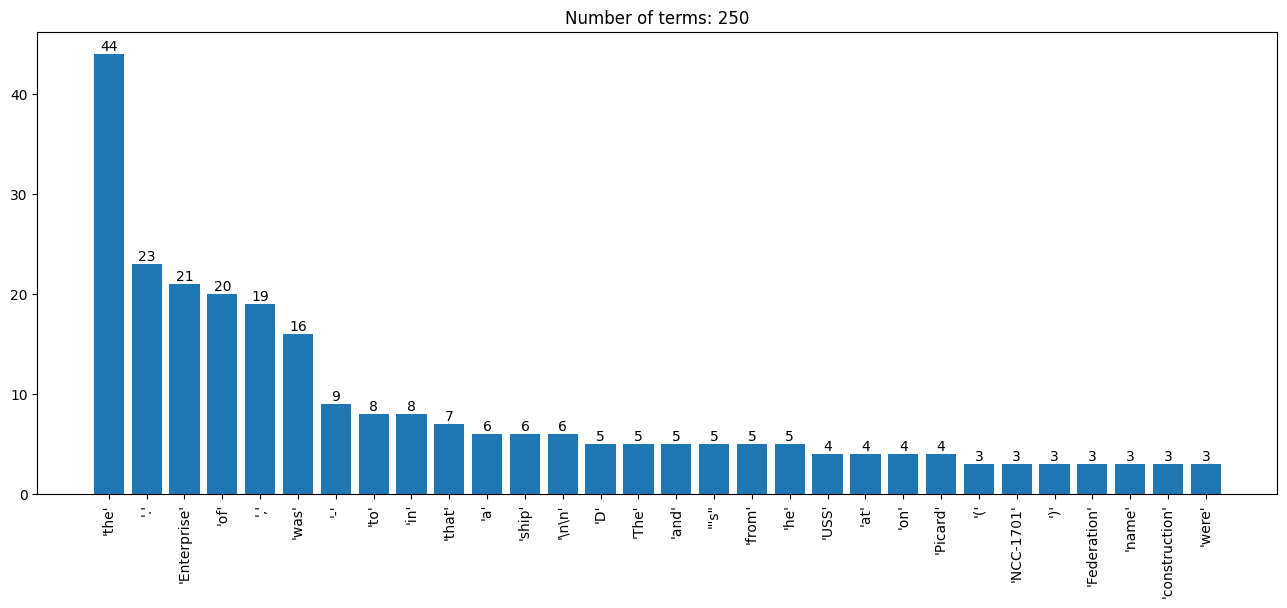

In [24]:
# ANSWER
plot_words(['%r' % t.text for t in doc])

### Stop Words

In [26]:
## spaCy
print('i | with stop words without')
print('--| --------------- ------------')

# for all the tokens
for i, t in enumerate(doc):
    print('%2d| %-15r %r' % (i+1, t.text, ('' if t.is_stop else t.text)))

    # break after the first sentence
    if t.text == '.':
        break

i | with stop words without
--| --------------- ------------
 1| 'USS'           'USS'
 2| 'Enterprise'    'Enterprise'
 3| '('             '('
 4| 'NCC-1701'      'NCC-1701'
 5| '-'             '-'
 6| 'D'             'D'
 7| ')'             ')'
 8| '\n\n\n\n'      '\n\n\n\n'
 9| 'The'           ''
10| 'USS'           'USS'
11| 'Enterprise'    'Enterprise'
12| '('             '('
13| 'NCC-1701'      'NCC-1701'
14| '-'             '-'
15| 'D'             'D'
16| ')'             ')'
17| 'was'           ''
18| 'a'             ''
19| '24th'          '24th'
20| 'century'       'century'
21| 'United'        'United'
22| 'Federation'    'Federation'
23| 'of'            ''
24| 'Planets'       'Planets'
25| 'Galaxy'        'Galaxy'
26| 'Class'         'Class'
27| 'starship'      'starship'
28| 'operated'      'operated'
29| 'by'            ''
30| 'Starfleet'     'Starfleet'
31| ','             ','
32| 'and'           ''
33| 'the'           ''
34| 'fifth'         'fifth'
35| 'Federation'    'Fe

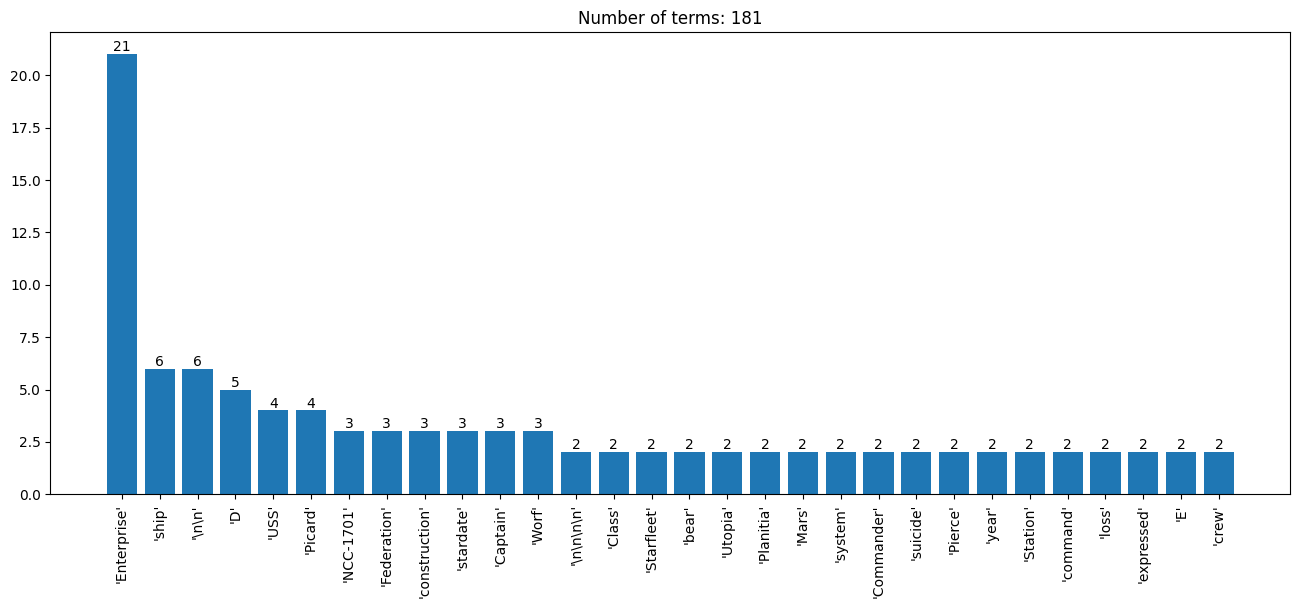

In [30]:
plot_words(['%r' % t.text for t in doc if not (t.is_stop | t.is_punct)]) # Remove stop words and punctuatio

### Check Part of Speech

In [32]:
## spaCy
for i, t in enumerate(doc):
    print('%2d|%-12r : %-5s %s' % (i+1, t.text, t.pos_, t.tag_))
    if t.text == '.':
        break

 1|'USS'        : PROPN NNP
 2|'Enterprise' : PROPN NNP
 3|'('          : PUNCT -LRB-
 4|'NCC-1701'   : PROPN NNP
 5|'-'          : PUNCT HYPH
 6|'D'          : PROPN NNP
 7|')'          : PUNCT -RRB-
 8|'\n\n\n\n'   : SPACE _SP
 9|'The'        : DET   DT
10|'USS'        : PROPN NNP
11|'Enterprise' : PROPN NNP
12|'('          : PUNCT -LRB-
13|'NCC-1701'   : PROPN NNP
14|'-'          : PUNCT HYPH
15|'D'          : PROPN NNP
16|')'          : PUNCT -RRB-
17|'was'        : AUX   VBD
18|'a'          : DET   DT
19|'24th'       : ADJ   JJ
20|'century'    : NOUN  NN
21|'United'     : PROPN NNP
22|'Federation' : PROPN NNP
23|'of'         : ADP   IN
24|'Planets'    : PROPN NNPS
25|'Galaxy'     : PROPN NNP
26|'Class'      : PROPN NNP
27|'starship'   : NOUN  NN
28|'operated'   : VERB  VBN
29|'by'         : ADP   IN
30|'Starfleet'  : PROPN NNP
31|','          : PUNCT ,
32|'and'        : CCONJ CC
33|'the'        : DET   DT
34|'fifth'      : PROPN NNP
35|'Federation' : PROPN NNP
36|'ship'       : NO

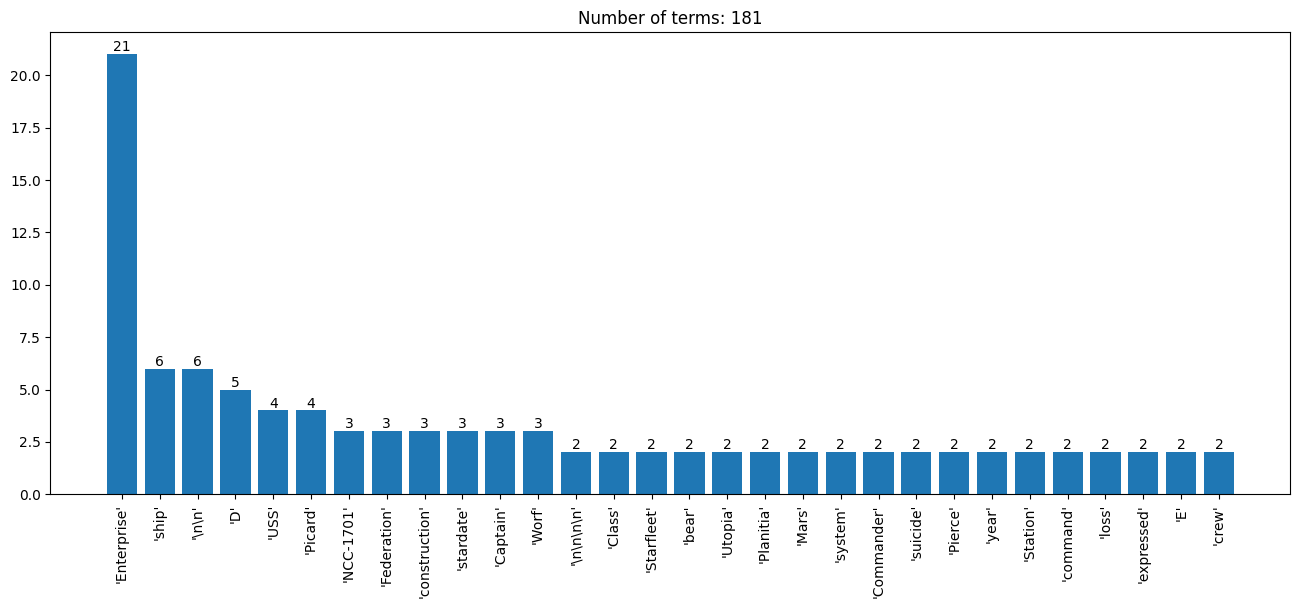

In [34]:
plot_words(['%r' % t.text for t in doc if not (t.is_stop|t.is_punct)])

### Lemmatisation

In [36]:
## spaCy
print('i | Token        Lemma')
print('--| ------------ ------------')
for i, t in enumerate(doc):
    print('%2d| %-12r %r' % (i+1, t.text, t.lemma_))
    if t.text == '.':
        break

i | Token        Lemma
--| ------------ ------------
 1| 'USS'        'USS'
 2| 'Enterprise' 'Enterprise'
 3| '('          '('
 4| 'NCC-1701'   'NCC-1701'
 5| '-'          '-'
 6| 'D'          'D'
 7| ')'          ')'
 8| '\n\n\n\n'   '\n\n\n\n'
 9| 'The'        'the'
10| 'USS'        'USS'
11| 'Enterprise' 'Enterprise'
12| '('          '('
13| 'NCC-1701'   'NCC-1701'
14| '-'          '-'
15| 'D'          'D'
16| ')'          ')'
17| 'was'        'be'
18| 'a'          'a'
19| '24th'       '24th'
20| 'century'    'century'
21| 'United'     'United'
22| 'Federation' 'Federation'
23| 'of'         'of'
24| 'Planets'    'Planets'
25| 'Galaxy'     'Galaxy'
26| 'Class'      'Class'
27| 'starship'   'starship'
28| 'operated'   'operate'
29| 'by'         'by'
30| 'Starfleet'  'Starfleet'
31| ','          ','
32| 'and'        'and'
33| 'the'        'the'
34| 'fifth'      'fifth'
35| 'Federation' 'Federation'
36| 'ship'       'ship'
37| 'to'         'to'
38| 'bear'       'bear'
39| 'the'        '

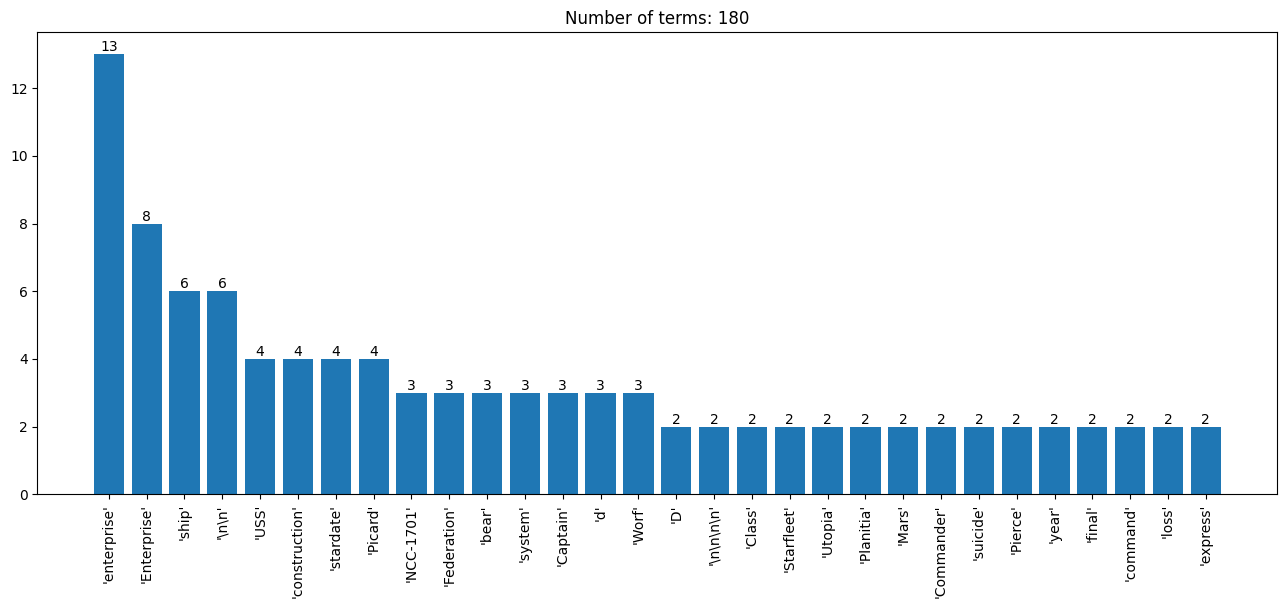

In [38]:
plot_words(['%r' % t.lemma_ for t in doc if not (t.is_stop | t.is_punct)])

### Entity Recognition

In [41]:
## spaCy
for i, s in enumerate(doc.sents):
    print('%2d: %s' % (i, re.sub(r'\n+', '', s.text)))
    if s.as_doc().ents:
        print('-'*80)
        for e in s.as_doc().ents:
            print('%-11s: %s' % (e.label_, re.sub(r'\n+', '', e.text)))
    print('='*80)

 0: USS Enterprise (NCC-1701-D)The USS Enterprise (NCC-1701-D) was a 24th century United Federation of Planets Galaxy Class starship operated by Starfleet, and the fifth Federation ship to bear the name Enterprise.
--------------------------------------------------------------------------------
ORG        : USS Enterprise
ORG        : The USS Enterprise
DATE       : a 24th century
ORG        : United Federation of Planets Galaxy
ORDINAL    : fifth
 1: During her career, the Enterprise served as the Federation flagship.
--------------------------------------------------------------------------------
ORG        : Enterprise
ORG        : Federation
 2: The Enterprise was destroyed during the Battle of Veridian III in 2371.
--------------------------------------------------------------------------------
EVENT      : the Battle of Veridian III
DATE       : 2371
 3: The Enterprise was built at Utopia Planitia Fleet Yards orbiting Mars in the Solar system.
------------------------------------

## Extra: Using NLTK for NLP

### Tokenise

In [44]:
# use nltk to find tokens
tokens = nltk.word_tokenize(text)

for i, t in enumerate(tokens[:25]):
    print('%2d| %r' % (i+1, t))

 1| 'USS'
 2| 'Enterprise'
 3| '('
 4| 'NCC-1701-D'
 5| ')'
 6| 'The'
 7| 'USS'
 8| 'Enterprise'
 9| '('
10| 'NCC-1701-D'
11| ')'
12| 'was'
13| 'a'
14| '24th'
15| 'century'
16| 'United'
17| 'Federation'
18| 'of'
19| 'Planets'
20| 'Galaxy'
21| 'Class'
22| 'starship'
23| 'operated'
24| 'by'
25| 'Starfleet'


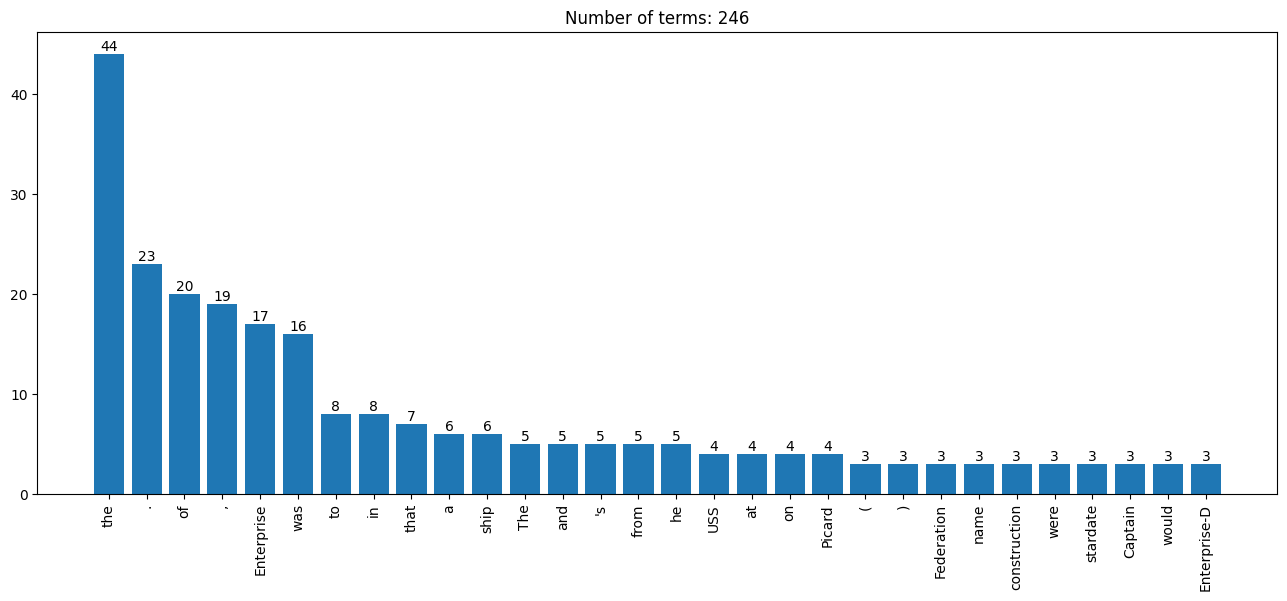

In [46]:
plot_words(tokens)

### Stop words

In [49]:
stopWords = nltk.corpus.stopwords.words('english')

stopWords.sort()
print(', '.join(stopWords))

a, about, above, after, again, against, ain, all, am, an, and, any, are, aren, aren't, as, at, be, because, been, before, being, below, between, both, but, by, can, couldn, couldn't, d, did, didn, didn't, do, does, doesn, doesn't, doing, don, don't, down, during, each, few, for, from, further, had, hadn, hadn't, has, hasn, hasn't, have, haven, haven't, having, he, he'd, he'll, he's, her, here, hers, herself, him, himself, his, how, i, i'd, i'll, i'm, i've, if, in, into, is, isn, isn't, it, it'd, it'll, it's, its, itself, just, ll, m, ma, me, mightn, mightn't, more, most, mustn, mustn't, my, myself, needn, needn't, no, nor, not, now, o, of, off, on, once, only, or, other, our, ours, ourselves, out, over, own, re, s, same, shan, shan't, she, she'd, she'll, she's, should, should've, shouldn, shouldn't, so, some, such, t, than, that, that'll, the, their, theirs, them, themselves, then, there, these, they, they'd, they'll, they're, they've, this, those, through, to, too, under, until, up, v

In [51]:
# ANSWER
# NOTE: see the `.lower()` method applied to token
tokens_no_stop = [t for t in tokens if t.lower() not in stopWords] # create a list of tokens withOUT the stop words

In [53]:
## NLTK
i = 0
j = 0

print('i | with stop words without')
print('--| --------------- ------------')

# for all the tokens
while i < len(tokens):
    # same word
    if tokens[i] == tokens_no_stop[j]:
        print('%2d| %-15r %r' % (i+1, tokens[i], tokens_no_stop[j]))
        j += 1
    # not the same word
    else:
        print('%2d| %-15r' % (i+1, tokens[i]))

    # next word
    i += 1
    # break after the first sentence
    if tokens[i-1] == '.':
        break

i | with stop words without
--| --------------- ------------
 1| 'USS'           'USS'
 2| 'Enterprise'    'Enterprise'
 3| '('             '('
 4| 'NCC-1701-D'    'NCC-1701-D'
 5| ')'             ')'
 6| 'The'          
 7| 'USS'           'USS'
 8| 'Enterprise'    'Enterprise'
 9| '('             '('
10| 'NCC-1701-D'    'NCC-1701-D'
11| ')'             ')'
12| 'was'          
13| 'a'            
14| '24th'          '24th'
15| 'century'       'century'
16| 'United'        'United'
17| 'Federation'    'Federation'
18| 'of'           
19| 'Planets'       'Planets'
20| 'Galaxy'        'Galaxy'
21| 'Class'         'Class'
22| 'starship'      'starship'
23| 'operated'      'operated'
24| 'by'           
25| 'Starfleet'     'Starfleet'
26| ','             ','
27| 'and'          
28| 'the'          
29| 'fifth'         'fifth'
30| 'Federation'    'Federation'
31| 'ship'          'ship'
32| 'to'           
33| 'bear'          'bear'
34| 'the'          
35| 'name'          'name'
36| 'Enterpri

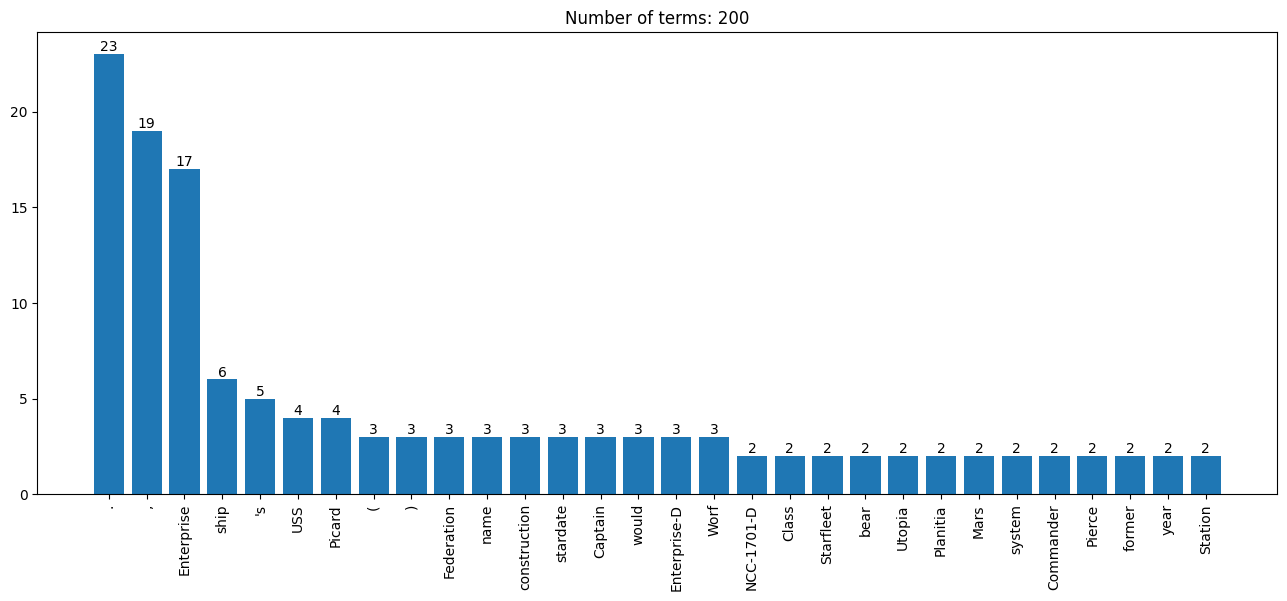

In [55]:
# Create plot of words without stopword
# ANSWER
plot_words(tokens_no_stop)

### Check Part of Speech

In [57]:
# define PoS
pos_list = {
    'CC':   'coordinating conjunction',
    'CD':   'cardinal digit',
    'DT':   'determiner',
    'EX':   'existential there (like: "there is" ... think of it like "there exists")',
    'FW':   'foreign word',
    'IN':   'preposition/subordinating conjunction',
    'JJ':   'adjective "big"',
    'JJR':  'adjective, comparative "bigger"',
    'JJS':  'adjective, superlative "biggest"',
    'LS':   'list marker 1)',
    'MD':   'modal could, will',
    'NN':   'noun, singular "desk"',
    'NNS':  'noun plural "desks"',
    'NNP':  'proper noun, singular "Harrison"',
    'NNPS': 'proper noun, plural "Americans"',
    'PDT':  'predeterminer "all the kids"',
    'POS':  'possessive ending parent"s',
    'PRP':  'personal pronoun I, he, she',
    'PRP$': 'possessive pronoun my, his, hers',
    'RB':   'adverb very, silently,',
    'RBR':  'adverb, comparative better',
    'RBS':  'adverb, superlative best',
    'RP':   'particle give up',
    'TO':   'to go "to" the store.',
    'UH':   'interjection errrrrrrrm',
    'VB':   'verb, base form take',
    'VBD':  'verb, past tense took',
    'VBG':  'verb, gerund/present participle taking',
    'VBN':  'verb, past participle taken',
    'VBP':  'verb, sing. present, non-3d take',
    'VBZ':  'verb, 3rd person sing. present takes',
    'WDT':  'wh-determiner which',
    'WP':   'wh-pronoun who, what',
    'WP$':  'possessive wh-pronoun whose',
    'WRB':  'wh-abverb where, when',
}

In [90]:
# nltk.download('averaged_perceptron_tagger_eng')

In [59]:
## nltk
tagged = nltk.pos_tag(tokens)

for i, t in enumerate(tagged[:25]):
    print('%2d|%-12r : %-4s %s' % (i+1, t[0], t[1], (pos_list[t[1]] if t[1] in pos_list else '-')))

 1|'USS'        : NNP  proper noun, singular "Harrison"
 2|'Enterprise' : NNP  proper noun, singular "Harrison"
 3|'('          : (    -
 4|'NCC-1701-D' : NNP  proper noun, singular "Harrison"
 5|')'          : )    -
 6|'The'        : DT   determiner
 7|'USS'        : NNP  proper noun, singular "Harrison"
 8|'Enterprise' : NNP  proper noun, singular "Harrison"
 9|'('          : (    -
10|'NCC-1701-D' : NNP  proper noun, singular "Harrison"
11|')'          : )    -
12|'was'        : VBD  verb, past tense took
13|'a'          : DT   determiner
14|'24th'       : JJ   adjective "big"
15|'century'    : NN   noun, singular "desk"
16|'United'     : NNP  proper noun, singular "Harrison"
17|'Federation' : NNP  proper noun, singular "Harrison"
18|'of'         : IN   preposition/subordinating conjunction
19|'Planets'    : NNP  proper noun, singular "Harrison"
20|'Galaxy'     : NNP  proper noun, singular "Harrison"
21|'Class'      : NNP  proper noun, singular "Harrison"
22|'starship'   : NN   nou

### Stemming

In [62]:
## nltk
ps = nltk.porter.PorterStemmer()
stemmed = ' '.join([ps.stem(word) for word in text.split()])

### Lemmatisation

In [65]:
## nltk
wl = nltk.stem.WordNetLemmatizer()
lemma = ' '.join([wl.lemmatize(word) for word in text.split()])

In [66]:
## nltk
dot = stemmed.find('.') + 1
sl = stemmed[:dot].split()
dot = lemma.find('.') + 1
ll = lemma[:dot].split()

print('i | Stem           Lemma')
print('--| -------------- ------------')
for i, p in enumerate(zip(sl, ll)):
    print('%2d| %-12r   %-12r' % (i+1, p[0], p[1]))

i | Stem           Lemma
--| -------------- ------------
 1| 'uss'          'USS'       
 2| 'enterpris'    'Enterprise'
 3| '(ncc-1701-d)'   '(NCC-1701-D)'
 4| 'the'          'The'       
 5| 'uss'          'USS'       
 6| 'enterpris'    'Enterprise'
 7| '(ncc-1701-d)'   '(NCC-1701-D)'
 8| 'wa'           'wa'        
 9| 'a'            'a'         
10| '24th'         '24th'      
11| 'centuri'      'century'   
12| 'unit'         'United'    
13| 'feder'        'Federation'
14| 'of'           'of'        
15| 'planet'       'Planets'   
16| 'galaxi'       'Galaxy'    
17| 'class'        'Class'     
18| 'starship'     'starship'  
19| 'oper'         'operated'  
20| 'by'           'by'        
21| 'starfleet,'   'Starfleet,'
22| 'and'          'and'       
23| 'the'          'the'       
24| 'fifth'        'fifth'     
25| 'feder'        'Federation'
26| 'ship'         'ship'      
27| 'to'           'to'        
28| 'bear'         'bear'      
29| 'the'          'the'       
30| 'na

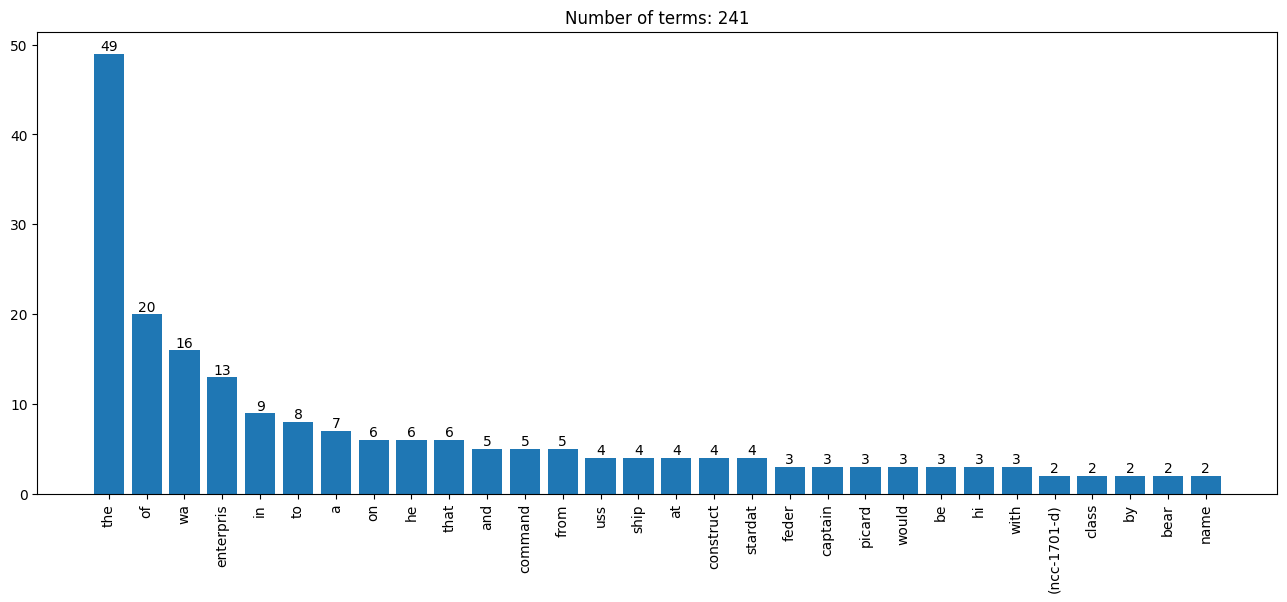

In [69]:
plot_words(stemmed.split())

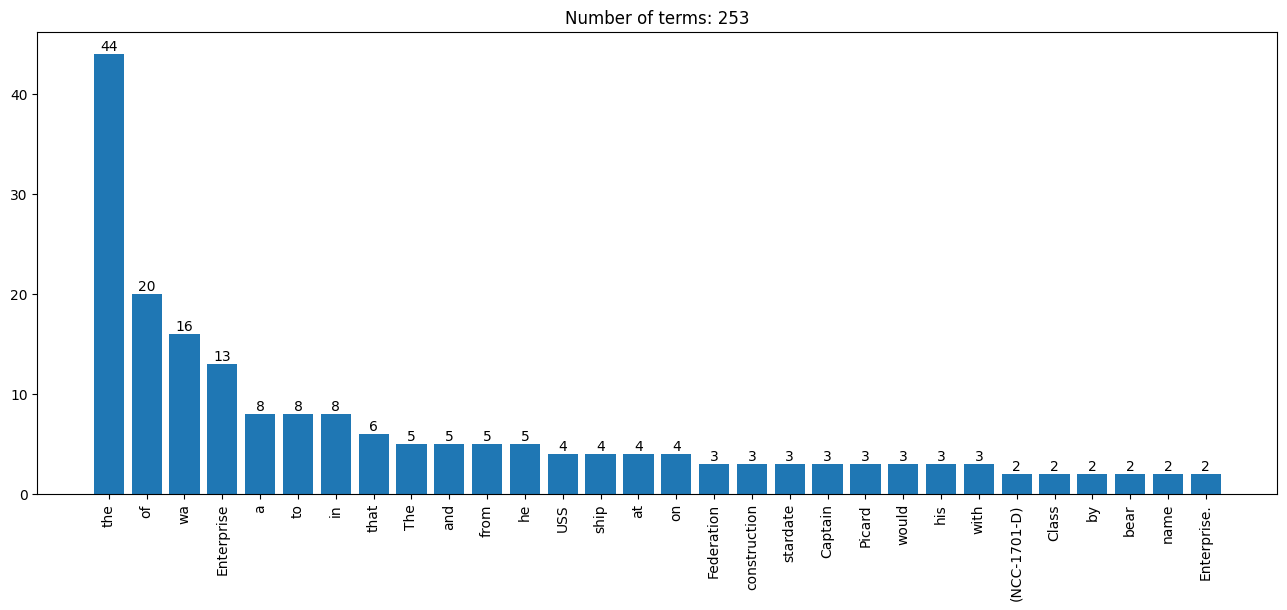

In [71]:
plot_words(lemma.split())

### Entity recognition

In [109]:
# nltk.download('maxent_ne_chunker_tab')

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     C:\Users\nsk_z\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker_tab.zip.


True

In [115]:
# nltk.download('words')

In [73]:
## nltk
entities = nltk.chunk.ne_chunk(tagged)

for e in entities:
    s = re.sub(r'[\(\)]', '', str(e))
    if s.find('/NNP') > 0:
        t = s.split()[0]
        n = ' '.join([re.sub(r'/NNP', '', x) for x in s.split()[1:]])
        print('%-12s: %s' % (t, n))

ORGANIZATION: USS Enterprise
ORGANIZATION: USS Enterprise
PERSON      : United Federation
ORGANIZATION: Planets Galaxy
PERSON      : Starfleet
ORGANIZATION: Enterprise
ORGANIZATION: Federation
ORGANIZATION: Battle
GPE         : Veridian
ORGANIZATION: Utopia Planitia Fleet
PERSON      : Mars
ORGANIZATION: Solar
ORGANIZATION: Commander Orfil Quinteros
PERSON      : Brahms
ORGANIZATION: Enterprise
ORGANIZATION: Enterprise
ORGANIZATION: USS Pegasus
ORGANIZATION: Utopia Planitia
PERSON      : Walter Pierce
PERSON      : Marla Finn
PERSON      : William Hodges
PERSON      : Pierce
ORGANIZATION: Enterprise
PERSON      : Mars
ORGANIZATION: Enterprise
ORGANIZATION: Enterprise
FACILITY    : Earth Station McKinley
PERSON      : Captain Jean-Luc Picard
ORGANIZATION: Rear Admiral Norah Satie
ORGANIZATION: Commander Riker
ORGANIZATION: Enterprise
PERSON      : Picard
PERSON      : Deep Space
GPE         : Starfleet
PERSON      : Captain Benjamin Sisko
ORGANIZATION: Enterprise
GPE         : Worf
ORGA



---



---



> > > > > > > > > © 2025 Institute of Data


---



---



